In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("ticks")
from scipy import integrate, optimize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.basemap import Basemap
from itertools import chain

In [2]:
df = pd.read_csv('Mada-COVID.csv')
df.tail(11)

,Region,Lat,Long,dated,new_case,cured_case,death_case,Confirmed,Cured,Death
837,Diana,-12.266666,49.283332,2020-09-03,5,0,0,16050,14031,197
838,Anôsy,-25.033333,46.983329,2020-09-03,2,0,0,16050,14031,197
839,Menabe,-20.284166,44.317165,2020-09-03,9,0,0,16050,14031,197
840,Analamanga,-18.933330,47.516665,2020-09-04,50,44,1,16131,14075,198
841,Alaotra_Mangoro,-17.900000,48.400000,2020-09-04,1,0,0,16131,14075,198
842,Atsinanana,-18.149999,49.416665,2020-09-04,3,0,0,16131,14075,198
843,Matsiatra-ambony,-21.452670,47.085690,2020-09-04,4,0,0,16131,14075,198
844,Sofia,-14.872398,47.983399,2020-09-04,3,0,0,16131,14075,198
845,Diana,-12.266666,49.283332,2020-09-04,10,0,0,16131,14075,198
846,Atsimo_Andrefana,-23.350000,43.666670,2020-09-04,9,0,0,16131,14075,198


In [10]:
df1 = df.dropna
df1.to_csv('covid-mada.csv')

AttributeError: 'function' object has no attribute 'to_csv'

In [4]:
mada_df = pd.DataFrame()
mada_df['date'] = df.dated.unique()
mada_df['new_case'] = df.groupby('dated').agg({'new_case':['sum']}).values
mada_df['cured_case'] = df.groupby('dated').agg({'cured_case':['sum']}).values
mada_df['death_case'] = df.groupby('dated').agg({'death_case':['sum']}).values
mada_df['Confirmed'] = df.groupby('dated').agg({'Confirmed':['mean']}).values
mada_df['Cured'] = df.groupby('dated').agg({'Cured':['mean']}).values
mada_df['Death'] = df.groupby('dated').agg({'Death':['mean']}).values
mada_df = mada_df.set_index('date')

In [5]:
cas = df.groupby('dated').agg({'new_case':['sum']})
guerri = df.groupby('dated').agg({'cured_case':['sum']})
cas_mor = df.groupby('dated').agg({'death_case':['sum']})
conf = df.groupby('dated').agg({'Confirmed':['mean']})
rec = df.groupby('dated').agg({'Cured':['mean']})
mor = df.groupby('dated').agg({'Death':['mean']})

In [6]:
df_tana = df[df['Region']=='Analamanga']
df_tamaga = df[df['Region']=='Atsinanana']

cas_tana = df_tana.groupby('dated').agg({'new_case':['sum']})
conf_tana = df_tana.groupby('dated').agg({'new_case':['sum']}).cumsum()

cas_tamatave = df_tamaga.groupby('dated').agg({'new_case':['sum']})
conf_tamatave = df_tamaga.groupby('dated').agg({'new_case':['sum']}).cumsum()

mada_df['day_count'] = list(range(1,len(mada_df)+1))
y_mada = cas.values
xdata_mada = mada_df.day_count
x_mada = np.array(xdata_mada, dtype=float)
x_m = x_mada[:,np.newaxis]

df_tamaga['day_count'] = list(range(1,len(df_tamaga)+1))
y_tamaga = cas_tamatave.values
xdata_tamaga = df_tamaga.day_count
x_tamaga = np.array(xdata_tamaga, dtype=float)
x_t = x_tamaga[:,np.newaxis]

df_tana['day_count'] = list(range(1,len(df_tana)+1))
y_tana = df_tana['new_case'].values
xdata_tana = df_tana.day_count
x_tana = np.array(xdata_tana, dtype=float)
x_a = x_tana[:,np.newaxis]

/home/lingz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/lingz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
poly_reg = PolynomialFeatures(degree=10)
y_reg_tana = poly_reg.fit_transform(x_a)
model = LinearRegression()
model.fit(y_reg_tana, y_tana)

y_reg_tamaga = poly_reg.fit_transform(x_t)
model1 = LinearRegression()
model1.fit(y_reg_tamaga, y_tamaga)

y_reg_mada = poly_reg.fit_transform(x_m)
model2 = LinearRegression()
model2.fit(y_reg_mada, y_mada)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

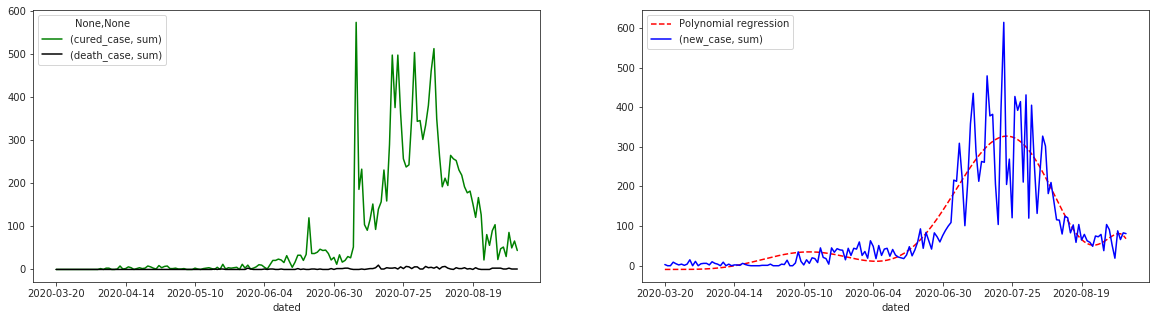

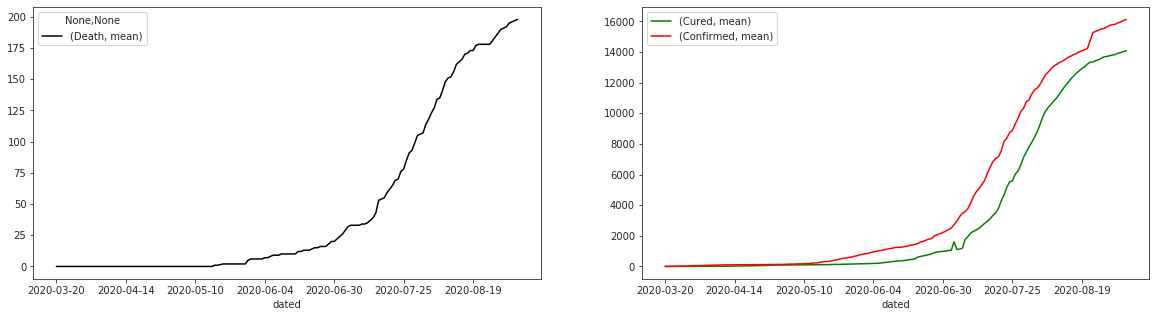

In [9]:
fig ,(ax1,ax2)= plt.subplots(1,2, figsize=(20,5))
plt.plot(model2.predict(y_reg_mada),'--',color='red',label='Polynomial regression')
cas.plot(ax=ax2,color='blue',label='Confirmés journalier')

guerri.plot(ax=ax1,color='green',label='Guerrison journalier')
cas_mor.plot(ax=ax1,color='black',label='Mortalite journalier')
plt.legend()
plt.savefig('mada_cas_journalier.png',dpi=300)
#plt.savefig('mada_cas_journalier.eps')

fig ,(ax1,ax2)= plt.subplots(1,2, figsize=(20,5))
rec.plot(ax=ax2,color='green',label='Guérisons')
mor.plot(ax=ax1,color='black',label='Décès')
conf.plot(ax=ax2,color='red',label='Confirmés')
plt.legend()
#plt.savefig('mada_cas_cumule.png',dpi=300)
#plt.savefig('mada_cas_cumule.eps')

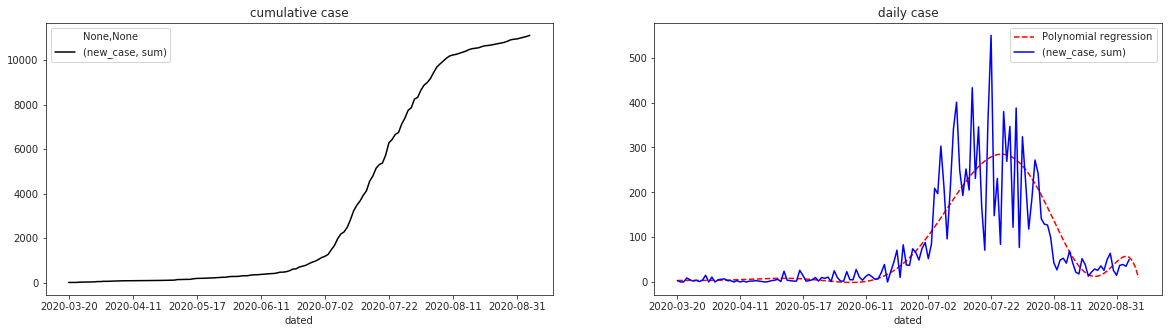

In [10]:
fig ,(ax1,ax2)= plt.subplots(1,2, figsize=(20,5))
plt.plot(model.predict(y_reg_tana),'--',color='red',label='Polynomial regression')
cas_tana.plot(ax=ax2,color='blue',label='Confirmés journalier')
conf_tana.plot(ax=ax1,color='black',label='Confirmés cumulée')
ax2.set_title('daily case')
ax1.set_title('cumulative case')
plt.legend()
#plt.savefig('cas_tana.png',dpi=300)
#plt.savefig('cas_tana.eps')

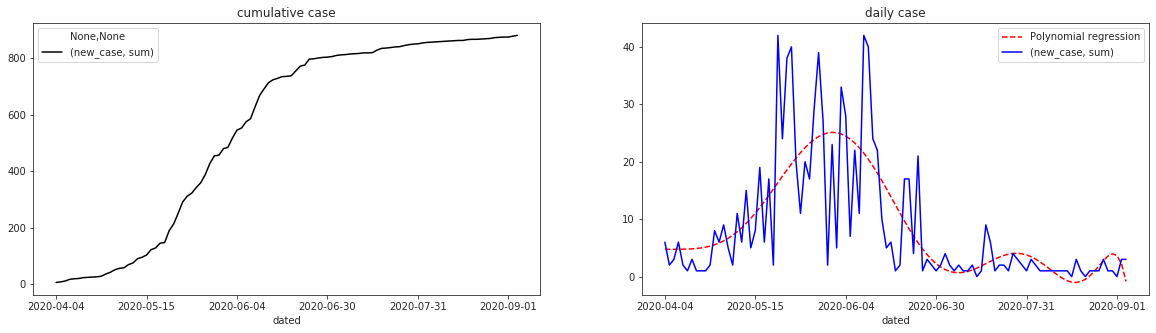

In [11]:
fig ,(ax1,ax2)= plt.subplots(1,2, figsize=(20,5))
plt.plot(model1.predict(y_reg_tamaga),'--',color='red',label='Polynomial regression')
cas_tamatave.plot(ax=ax2,color='blue',label='Confirmés journalier')
conf_tamatave.plot(ax=ax1,color='black',label='Confirmés cumulée')
ax2.set_title('daily case')
ax1.set_title('cumulative case')
plt.legend()
#plt.savefig('cas_tamatave.png',dpi=300)
#plt.savefig('cas_tamatave.eps')